<a href="https://colab.research.google.com/github/Daniedmath1405/Estadistica_II/blob/main/Parte_practica_parcial_1_estadistica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte práctica primer parcial Estadística II
**Integrantes:**  
    - Daniel Eduardo Naranjo Garzón  
    - Brayan Isaac Vásquez Portocarrero

In [29]:
# Importación de paquetes fundamentales
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.linear_model import *
import numpy as np
from mpl_toolkits.mplot3d import *
from sklearn.neural_network import *
from scipy.stats import *
from google.colab import *
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [30]:
# Cargue del archivo de datos
ruta_archivo = '/content/drive/MyDrive/Universidad/Quinto semestre/Estadística II/SB11_20231.TXT'
datos_icfes = pd.read_csv(ruta_archivo, sep='¬', index_col=0, engine='python')
datos_icfes.head(4)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
ESTU_TIPODOCUMENTO,,,,,,,,,,,,,,,,,,,,,
TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,CHÍA,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,YOTOCO,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR


### Eliminación de valores faltantes

In [31]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) & (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) & (~datos_icfes['PUNT_MATEMATICAS'].isna()) & (~datos_icfes['PUNT_C_NATURALES'].isna()) & (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) & (~datos_icfes['PUNT_INGLES'].isna())]
icfes_sin_nan.head(4)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
ESTU_TIPODOCUMENTO,,,,,,,,,,,,,,,,,,,,,
TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,CHÍA,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR
TI,COLOMBIA,F,04/05/2005,20231,SB11202310044933,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,69.0,57.0,B1,263,39.0,51.223795,3.0,3,92.0,PUBLICAR
TI,COLOMBIA,M,03/06/2005,20231,SB11202310029637,ESTUDIANTE,COLOMBIA,LA GUAJIRA,44,MAICAO,...,45.0,19.0,A-,271,43.0,57.690401,3.0,3,93.0,PUBLICAR


In [32]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
ESTU_TIPODOCUMENTO,,,,,
TI,67.532814,83,77,77,87.0
CC,41.863163,41,41,27,58.0
TI,51.223795,55,41,56,69.0
TI,57.690401,38,60,59,45.0


### Selección de variables explicativas a partir de los diagramas de dispersión


#### Con datos de validación

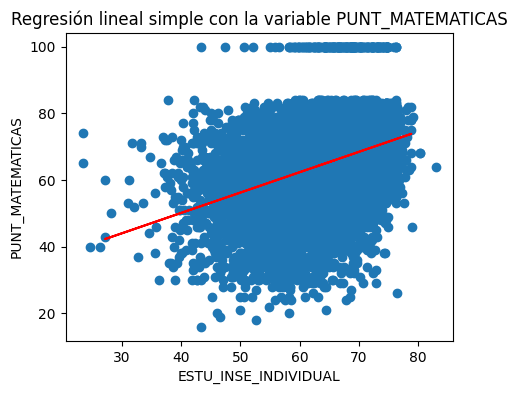

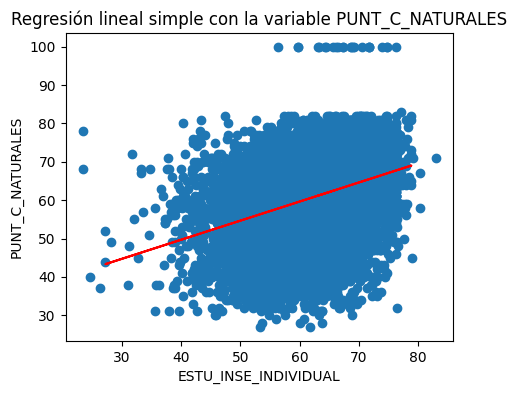

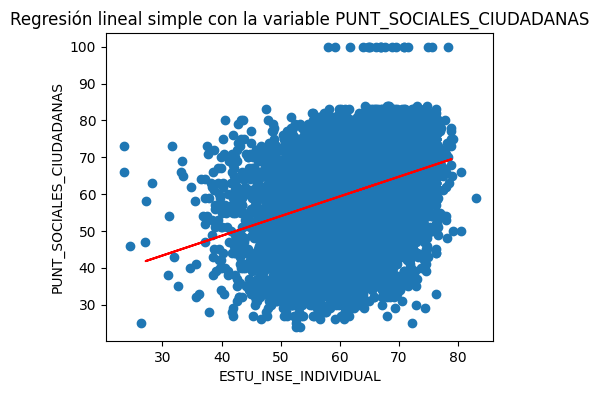

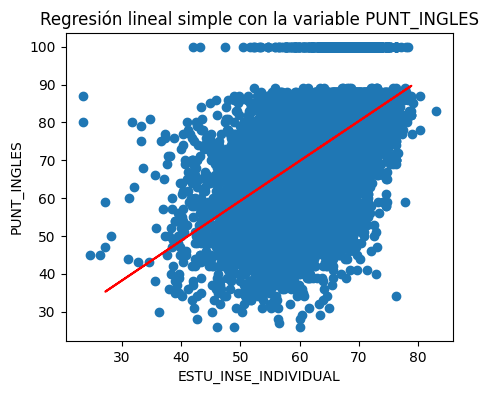

In [33]:
variables= ['PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']
for h in variables:
  x= np.array(tabla_regresion['ESTU_INSE_INDIVIDUAL']).reshape(-1, 1)
  y= tabla_regresion[h]
  trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=0)
  modelo_lineal0= LinearRegression()
  regresion0= modelo_lineal0.fit(trainx, trainy)
  pred_lineal0= regresion0.predict(testx)
  plt.figure(figsize=(5, 4))
  plt.scatter(tabla_regresion['ESTU_INSE_INDIVIDUAL'], tabla_regresion[h])
  plt.plot(testx, pred_lineal0, linestyle= '-', color='red')
  plt.xlabel('ESTU_INSE_INDIVIDUAL')
  plt.title(f'Regresión lineal simple con la variable {h}')
  plt.ylabel(h)

#### Con todos los datos

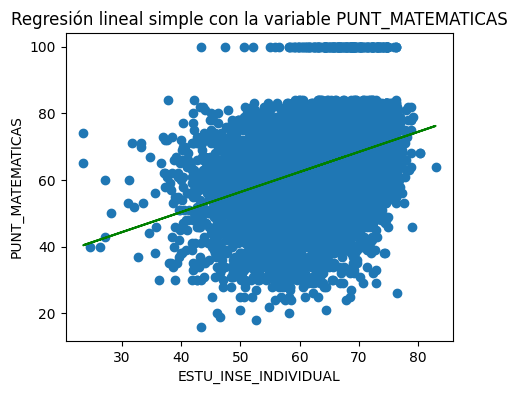

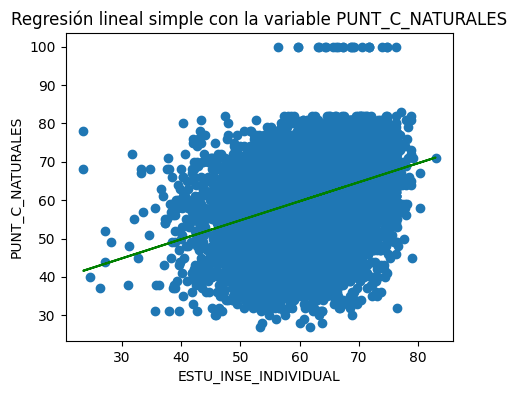

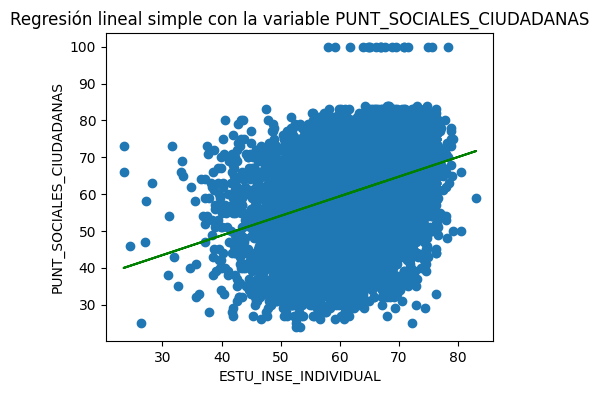

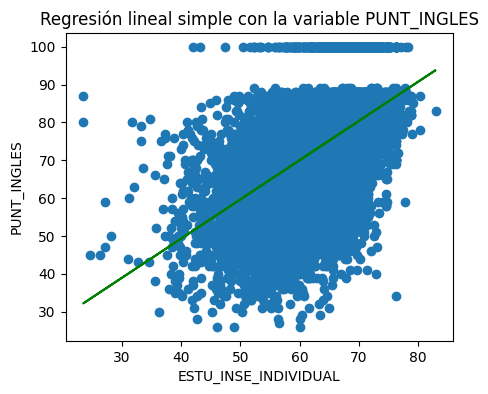

In [34]:
variables= ['PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']
for h in variables:
  x= np.array(tabla_regresion['ESTU_INSE_INDIVIDUAL']).reshape(-1, 1)
  y= tabla_regresion[h]
  trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=0)
  modelo_lineal0= LinearRegression()
  regresion0= modelo_lineal0.fit(x, y)
  pred_lineal0= regresion0.predict(x)
  plt.figure(figsize=(5, 4))
  plt.scatter(tabla_regresion['ESTU_INSE_INDIVIDUAL'], tabla_regresion[h])
  plt.plot(tabla_regresion['ESTU_INSE_INDIVIDUAL'], pred_lineal0, linestyle= '-', color='green')
  plt.xlabel('ESTU_INSE_INDIVIDUAL')
  plt.title(f'Regresión lineal simple con la variable {h}')
  plt.ylabel(h)

### Selección de variables explicativas a partir de los coeficientes de correlación

In [35]:
variables= ['PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']
for k in variables:
  pearson_corr = np.corrcoef(tabla_regresion[k], tabla_regresion['ESTU_INSE_INDIVIDUAL'])[0, 1]
  pearman_corr, _ = spearmanr(tabla_regresion[k], tabla_regresion['ESTU_INSE_INDIVIDUAL'])
  kendall_corr, _ = kendalltau(tabla_regresion[k], tabla_regresion['ESTU_INSE_INDIVIDUAL'])
  print(f"- Para la variable {k}, los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

- Para la variable PUNT_MATEMATICAS, los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.37666512872808017, 0.39393544035017275 y 0.2710503110002687.
- Para la variable PUNT_C_NATURALES, los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3598554924882554, 0.36474626881201705 y 0.2505193571669217.
- Para la variable PUNT_SOCIALES_CIUDADANAS, los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3572658294214808, 0.36242984564624287 y 0.24884271638677483.
- Para la variable PUNT_INGLES, los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5511549003261873, 0.565737484040732 y 0.39578544802151444.


### Selección de variables explicativas a partir del coeficiente de determinación calculados a partir del modelo de regresión lineal múltiple

In [36]:
X = tabla_regresion.drop('ESTU_INSE_INDIVIDUAL', axis = 1)
Y = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)
r_lineal = regresion.score(testX, testY)
trainX.head(4)

,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
ESTU_TIPODOCUMENTO,,,,
CC,66,65,61,75.0
TI,60,61,64,74.0
TI,76,62,59,78.0
TI,74,74,75,80.0


In [37]:
var_explicativas= ['PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']
coeficientes, predicciones = [], []
umbral=0.01
for p in var_explicativas:
  vartmpexp= var_explicativas.copy()
  vartmpexp.remove(p)
  X= tabla_regresion[vartmpexp]
  Y= tabla_regresion['ESTU_INSE_INDIVIDUAL']
  trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)
  modelo_lineal= LinearRegression()
  regresion= modelo_lineal.fit(trainX, trainY)
  pred_lineal= regresion.predict(testX)
  r2_lineal= regresion.score(testX, testY)
  coeficientes.append(r2_lineal)
  predicciones.append(list(pred_lineal))
  explicat= 'no' if abs(r2_lineal-r_lineal) < umbral else 'sí'
  print(f'### Usando la variable {p},\n{trainX.head(4)}\nPredicciones: {pred_lineal}\nCoeficiente de determinación con la variable {p}: {r_lineal}\nCoeficiente de determinación sin la variable {p}: {r2_lineal}\nLa variable {explicat} es una variable explicativa.\n\n')

### Usando la variable PUNT_MATEMATICAS,
                    PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES
ESTU_TIPODOCUMENTO                                                         
CC                                65                        61         75.0
TI                                61                        64         74.0
TI                                62                        59         78.0
TI                                74                        75         80.0
Predicciones: [66.28234306 62.47962174 64.70777128 ... 64.50326789 65.27233354
 63.43794705]
Coeficiente de determinación con la variable PUNT_MATEMATICAS: 0.2964820089952951
Coeficiente de determinación sin la variable PUNT_MATEMATICAS: 0.2984709506063664
La variable no es una variable explicativa.


### Usando la variable PUNT_C_NATURALES,
                    PUNT_MATEMATICAS  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES
ESTU_TIPODOCUMENTO                                                         
CC     

### Diagrama de dispersión con ciertas variables

------

In [38]:
XY, Z= tabla_regresion[['PUNT_INGLES']], tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size=0.2, random_state=0)
trainXY.head(4)

,PUNT_INGLES
ESTU_TIPODOCUMENTO,
CC,75.0
TI,74.0
TI,78.0
TI,80.0


In [39]:
modelo1= LinearRegression()
modelo1.fit(trainXY, trainZ)

LinearRegression()

In [40]:
modelo1.score(testXY, testZ)

0.2982987282607831

In [41]:
array= modelo1.coef_
array

array([0.29036719])

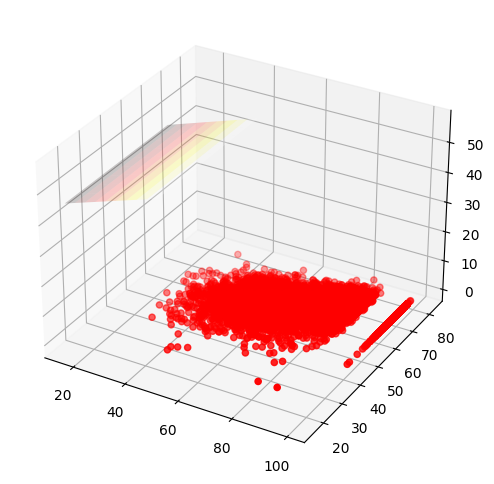

In [42]:
fig= plt.figure(figsize=(8, 6))
ax= fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, 10), np.linspace(15, 65, 10))
plano_reg= array[0]*xx + modelo1.intercept_
ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY['PUNT_INGLES'], trainZ, color='red', label='Datos de entrenamiento')

### Modelo de red neuronal de perceptrón multicapa

In [43]:
X = tabla_regresion.drop('ESTU_INSE_INDIVIDUAL', axis = 1)
Y = tabla_regresion['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)

,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
ESTU_TIPODOCUMENTO,,,,
CC,66,65,61,75.0
TI,60,61,64,74.0
TI,76,62,59,78.0
TI,74,74,75,80.0


In [44]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100), max_iter = 500, activation = 'relu', solver = 'adam', learning_rate = 'invscaling')
red.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [45]:
red.score(trainX, trainY)

0.3206303982408574

### Imputación

In [46]:
icfes_connan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &  (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) & (~datos_icfes['PUNT_MATEMATICAS'].isna()) & (~datos_icfes['PUNT_C_NATURALES'].isna()) & (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) & (~datos_icfes['PUNT_INGLES'].isna())]
icfes_connan.head(4)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
ESTU_TIPODOCUMENTO,,,,,,,,,,,,,,,,,,,,,
TI,COLOMBIA,F,25/10/2005,20231,SB11202310012523,ESTUDIANTE,COLOMBIA,VALLE,76,PALMIRA,...,52.0,33.0,A1,293,53.0,NaN,NaN,2,NaN,PUBLICAR
TI,COLOMBIA,M,03/05/2006,20231,SB11202310004061,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,57.0,42.0,A1,318,66.0,NaN,NaN,3,NaN,PUBLICAR
TI,COLOMBIA,F,24/09/2003,20231,SB11202310038767,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,46.0,23.0,A-,218,20.0,NaN,NaN,3,NaN,PUBLICAR
TI,COLOMBIA,M,22/12/2005,20231,SB11202310005059,ESTUDIANTE,COLOMBIA,VALLE,76,CALI,...,55.0,39.0,A1,280,46.0,NaN,NaN,3,NaN,PUBLICAR


In [47]:
print(2**100)

1267650600228229401496703205376
